<a href="https://colab.research.google.com/github/HanSong19/Hugging-Face/blob/main/2.1%20Model%20overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets evaluate transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.9 MB/s eta 0:00:00


##1. Tokenizer

### Split sentences/texts into a unit and match each toketn to an integer
import AutoTokenizer class from Transformer
use the from_pretrained() method.  
Checkpoint: "distilbert-base-uncased-finetuned-sst-2-english"
-> This will automatically fetch the data and cache it.  
Output is a dictionary containing 1) input ids and 2) attention_mastk.  


In [5]:
from transformers import AutoTokenizer

checkpoint= "distilbert-base-uncased-finetuned-sst-2-english"
Tokenizer = AutoTokenizer.from_pretrained(checkpoint)
raw_inputs = ["I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",]
inputs = Tokenizer(raw_inputs, padding = True, truncation= True, return_tensors='pt')
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


##2. Model
##2.1 hidden state
### Take the tokenized input and produce a high-dimensional vector (hidden states/ feature) that shows the contextual information of the input. These hidden states (high-dimensional vectors) becomes an input of the Head.

##2.2 model head
### The model is represented by embeddings and layers. Embedding converts each input ID from tokenization into a vector that represents the token. The subsequent layer manipulate these vectors using attention mechanism to produce the final representation of the sentence.

###The hidden stages (hig-dimentional vector) from the model sent directly to the model head and acts as the input. The model head projects this input to another dimension.

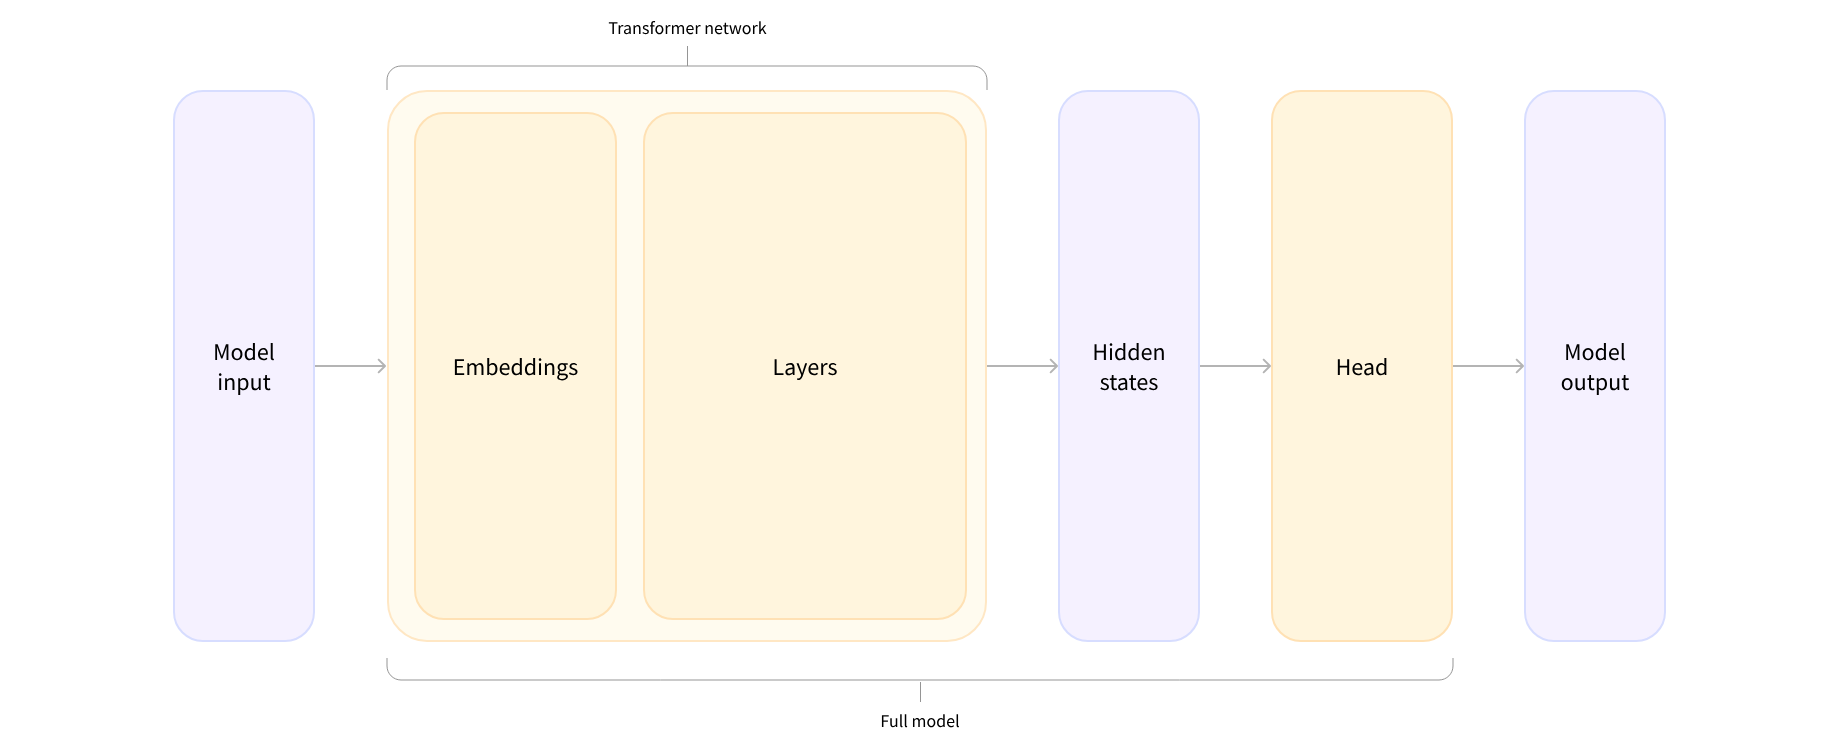


import AutoModel from transformers. Also use from_pretrained() method.
Use the same check point.



In [13]:
from transformers import AutoModel

model = AutoModel.from_pretrained(checkpoint)
outputs = model(**inputs)                                                        ## use **inputs instead of input because the inputs from the previous code is a dictionary.
                                                                                ## to use the values in the dictionary, I need to unpack it using ** (https://docs.python.org/3/tutorial/controlflow.html#arbitrary-argument-lists) see 4.8.5
print(outputs, outputs.last_hidden_state.shape)                                   ## .last_hidden_state.shape shows contains the hidden representations for each token in each sequence of the batch. So the size is (batch_size, seq_len, hidden_size).

BaseModelOutput(last_hidden_state=tensor([[[-0.1798,  0.2333,  0.6321,  ..., -0.3017,  0.5008,  0.1481],
         [ 0.2758,  0.6497,  0.3200,  ..., -0.0760,  0.5136,  0.1329],
         [ 0.9046,  0.0985,  0.2950,  ...,  0.3352, -0.1407, -0.6464],
         ...,
         [ 0.1466,  0.5661,  0.3235,  ..., -0.3376,  0.5100, -0.0561],
         [ 0.7500,  0.0487,  0.1738,  ...,  0.4684,  0.0030, -0.6084],
         [ 0.0519,  0.3729,  0.5223,  ...,  0.3584,  0.6500, -0.3883]],

        [[-0.2937,  0.7283, -0.1497,  ..., -0.1187, -1.0227, -0.0422],
         [-0.2206,  0.9384, -0.0951,  ..., -0.3643, -0.6605,  0.2407],
         [-0.1536,  0.8988, -0.0728,  ..., -0.2189, -0.8528,  0.0710],
         ...,
         [-0.3017,  0.9002, -0.0200,  ..., -0.1082, -0.8412, -0.0861],
         [-0.3338,  0.9674, -0.0729,  ..., -0.1952, -0.8181, -0.0634],
         [-0.3454,  0.8824, -0.0426,  ..., -0.0993, -0.8329, -0.1065]]],
       grad_fn=<NativeLayerNormBackward0>), hidden_states=None, attentions=None) t

The torch.Size([2, 16, 768]) shows that the batch size is 2 (we had 2 sentences in the input), sequence length is 16(we had 16 tokens per sentence) and hidden size is 768 (which is common for smaller models)

AutoModel was used in the previous code to show the structure but the task we are interested in is finding the sentiment of the sentences.
To find the sentiments of the sentence, import AutoModelForSequenceClassification.
use the same checkpoint.

In [19]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs=model(**inputs)
print(outputs.logits.shape)
print(outputs.logits)


torch.Size([2, 2])
tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)


the outputs.logits.shape retreives [2.2], which shows that there were 2 sentences and 2 labels.  
The outputs.logits retrieves [-1.5607,  1.6123], which is the raw number for the fist sentence, and retrives [ 4.1692, -3.3464], whcih is the raw number for the second sentence.

But these are raw, unnofmralized scores. TO see the probabilities, we need to convert the output using SoftMax layer.

import torch

In [23]:
import torch
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)      ## The nn package defines a set of Modules, which you can think of as a neural network layer that produces output from input and may have some trainable weights.
print(predictions)
model.config.id2label

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


{0: 'NEGATIVE', 1: 'POSITIVE'}

The prediction shows the probability of each sentence.
To see the lables of the model, I add model.config.id2lbles.
So, this means that for the first sentence, the percentage of time that the sentence is negative is 4.0195e-02%. And the percentage of tiem that the sentence is positive is 9.5980e-01%.


## Taking a closer look at the Model

Configuration: configuration file is a text file describing the parameters, choices, settings, and preferences that are applied to systems and applications. It shows my machine learning projects (https://www.tasq.ai/glossary/model-configuration/#:~:text=A%20config%20file%20is%20a,may%20utilize%20a%20configuration%20file.)

### Creating a Transformer

Create a transformer using BERT.  

1. load conficuration object (BertConfig).  
2. build a model from the configuration (BertModel).

In [26]:
from transformers import BertConfig, BertModel

#load and build the configuration of Bert
config = BertConfig()
#Building the model from confic
model = BertModel(config)

print(config)
print(model)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
    

At this point, the model was made but it is NOT traind AT ALL. So I need to train the model first. However, training the model would take a lot of time and datasets. Hence, I can use the from_pretrained() method to use the model that is already traind instead of BertConfig.

use "bert-base-cased" identifier (trained by authors of BERT).

In [31]:
model = BertModel.from_pretrained("bert-base-cased")

In [32]:
model.save_pretrained("directory_on_my_computer")

see the file icon in the left. I have two files: config.json, pytorch_model.bin (config.json file: the attributes necessary to build the model architecture. some metadata, such as where the checkpoint originated and what 🤗 Transformers version you were using when you last saved the checkpoint. The pytorch_model.bin file: state dictionary; it contains all your model’s weights.).
The two files go hand in hand; the configuration is necessary to know your model’s architecture, while the model weights are your model’s parameters.

## Input form for Transformer models

Transformer models only process numbers. Numbers that the tokenizer geenrates.

use the sequence ["Hello!", "Cool", "Nice!"] and converts these to sequences (input ID)



In [33]:
sequences= ["Hello!", "Cool.", "Nice!"]

In [34]:
encoded_sequences = [
    [101, 7592, 999, 102],
    [101, 4658, 1012, 102],
    [101, 3835, 999, 102],
]

Tensor only accept rectangular shapes!

In [36]:
import torch

model_input = torch.tensor(encoded_sequences)
output = model(model_input)